# Đây là file nháp để thực hiện vẽ bản đồ thành phố Hà nội

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from unidecode import unidecode

In [2]:
# Đọc shapefile chưa dữ liệu tọa độ của Việt Nam, lưu ý giữ nguyên thư mục diaphanhuyen mới hiện toàn bộ thông tin cần thiết
gdf = gpd.read_file('diaphanhuyen\Dia_phan_Huyen.shp')

In [3]:
# Giữ cột chứa tên quận/huyện và tọa độ, thay đổi tên cột
gdf = gdf[['Ten_Huyen', 'geometry']]
gdf = gdf.rename(columns={'Ten_Huyen': 'Quận'})
gdf.head()

,Quận,geometry
0,Nam Căn,"POLYGON ((105.05492 8.85322, 105.05819 8.85155..."
1,Dam Doi,"POLYGON ((105.16041 9.09551, 105.16228 9.09309..."
2,Cái Nước,"POLYGON ((105.08692 9.13987, 105.08773 9.13954..."
3,Đông Hải,"POLYGON ((105.55273 9.23437, 105.56841 9.17901..."
4,TP. Cà Mau,"POLYGON ((105.17230 9.26629, 105.17518 9.26575..."


In [4]:
# Các giá trị của tên quận hiện khá lung tung và không có dấu
gdf['Quận'].unique()

array(['Nam Căn', 'Dam Doi', 'Cái Nước', 'Đông Hải', 'TP. Cà Mau',
       'TP. Bạc Liêu', 'Giá Rai', 'Hòa BÌnh', 'Vĩnh Lợi', 'Vĩnh Châu',
       'Phước Long', 'Thanh Trì', 'Thới Bình', 'U Minh', 'My Xuyen',
       'Tran De', 'Ngã Năm', 'Hong Dan', 'Soc Trang', 'Vĩnh Thuận',
       'Mỹ Tú', 'Duyên Hải', 'Châu Thành', 'Cù Lao Dung', 'Long Phú',
       'Long Mỹ', 'U Minh Thượng', 'Tra Cu', 'Vi Thanh', 'Go Quao',
       'An Minh', 'Nga Bay', 'Tieu Can', 'Cau Ngang', 'Vi Thuy',
       'Phung Hiep', 'Ke Sach', 'Cau Ke', 'An Biên', 'Chau Thanh A',
       'Trà Vinh', 'Cai Rang', 'Phong Dien', 'Thanh Phu', 'Ninh Kieu',
       'Cang Long', 'Giong Rieng', 'Trà Ơn', 'Chau Thanh', 'Bình Minh',
       'Binh Thuy', 'Rach Gia', 'Thoi Lai', 'Tam Bình', 'Mo Cay Nam',
       'Vũng Liêm', 'Ba Tri', 'O Mon', 'Bình Tân', 'Tan Hiep', 'Co Do',
       'Mang Thít', 'Mo Cay Bac', 'Giong Trom', 'Ben Tre', 'Vĩnh Long',
       'Cho Lach', 'Binh Dai', 'Tân Phú Đông', 'Vinh Thanh', 'Long Hổ',
       'Thot Not', 'Lai 

# Tiến hành thay đổi tên trong cột Quận của bộ dữ liệu mình đang xét để có thể merge với bộ dữ liệu tọa độ

In [5]:
data = pd.read_csv('house.csv', index_col=0)

In [7]:
data['Quận'].unique()

array(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
       'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
       'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
       'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
       'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
       'Huyện Đông Anh', 'Huyện Thường Tín', 'Thị xã Sơn Tây',
       'Huyện Mê Linh', 'Huyện Thạch Thất', 'Huyện Quốc Oai',
       'Huyện Phúc Thọ', 'Huyện Phú Xuyên', 'Huyện Ba Vì', nan,
       'Huyện Mỹ Đức'], dtype=object)

In [8]:
data['Quận'] = data['Quận'].fillna('').apply(lambda x: x.replace('Quận ', '').replace('Huyện ', '').replace('Thị xã ', ''))
data['Quận'] = data['Quận'].replace(['Nam Từ Liêm', 'Bắc Từ Liêm'], 'Từ Liêm')
data['Quận'] = data['Quận'].apply(unidecode)
data.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích (m2),Dài (m),Rộng (m),Giá/m2 (triệu)
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cau Giay,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuan,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,NaN,NaN,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Ba Trung,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tay Ho,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuan,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,9.00,4.0,86.11


In [9]:
# Tính giá nhà trung bình theo từng quận
avg_by_quan = data.groupby('Quận')['Giá/m2 (triệu)'].mean().reset_index()
avg_by_quan

,Quận,Giá/m2 (triệu)
0,,4.300000e+01
1,Ba Dinh,1.304019e+02
2,Ba Vi,1.083233e+01
3,Cau Giay,1.297829e+02
4,Chuong My,2.352350e+01
5,Dan Phuong,4.394957e+01
6,Dong Anh,4.497740e+01
7,Dong Da,1.416923e+02
8,Gia Lam,6.546336e+01
9,Ha Dong,8.991877e+03


In [10]:
# Thêm tọa vào avg_by_quan
avg_by_quan = avg_by_quan.merge(gdf, on='Quận', how='left')
avg_by_quan

,Quận,Giá/m2 (triệu),geometry
0,,4.300000e+01,None
1,Ba Dinh,1.304019e+02,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
2,Ba Vi,1.083233e+01,"POLYGON ((105.42320 21.28991, 105.43024 21.283..."
3,Cau Giay,1.297829e+02,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
4,Chuong My,2.352350e+01,"POLYGON ((105.69211 20.95937, 105.69213 20.958..."
5,Dan Phuong,4.394957e+01,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
6,Dong Anh,4.497740e+01,"POLYGON ((105.87070 21.20770, 105.87097 21.207..."
7,Dong Da,1.416923e+02,"POLYGON ((105.83157 21.03140, 105.83820 21.030..."
8,Gia Lam,6.546336e+01,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
9,Ha Dong,8.991877e+03,"POLYGON ((105.73860 20.99242, 105.74547 20.992..."


In [14]:
# Chuyển đổi từ PandasDataFrame thành GeoDataFrame và chỉ giữ lại giá và tọa độ
avg_by_quan = gpd.GeoDataFrame(avg_by_quan[['Giá/m2 (triệu)', 'geometry']])
avg_by_quan

,Giá/m2 (triệu),geometry
0,4.300000e+01,None
1,1.304019e+02,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
2,1.083233e+01,"POLYGON ((105.42320 21.28991, 105.43024 21.283..."
3,1.297829e+02,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
4,2.352350e+01,"POLYGON ((105.69211 20.95937, 105.69213 20.958..."
5,4.394957e+01,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
6,4.497740e+01,"POLYGON ((105.87070 21.20770, 105.87097 21.207..."
7,1.416923e+02,"POLYGON ((105.83157 21.03140, 105.83820 21.030..."
8,6.546336e+01,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
9,8.991877e+03,"POLYGON ((105.73860 20.99242, 105.74547 20.992..."


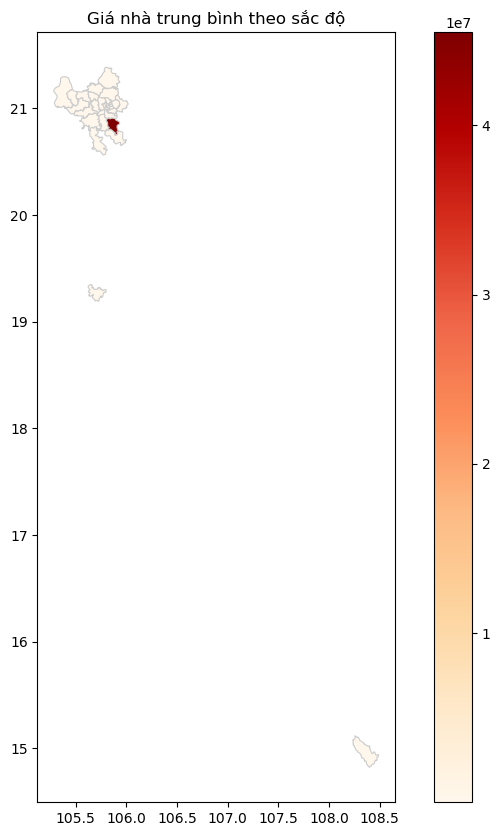

In [15]:
# Tiến hành vẽ bản đồ thành phố hà nội
fig, ax = plt.subplots(figsize=(10, 10))
avg_by_quan.plot(column='Giá/m2 (triệu)', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Giá nhà trung bình theo sắc độ')
plt.show()